In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


In [3]:

import re as re
data = pd.read_csv("Raw_Data.csv")
# Keeping only the neccessary columns



def find_number(text):
    num = re.findall(r'[1-9]+',text) #extract number from the rating
    return " ".join(num)
data['number_rating']=data['star_rating'].apply(lambda x: find_number(x))

#sos, ask Dr. Jones
data.head()

#number_rating column is a string


,coffee_shop_name,full_review_text,star_rating,number_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4


In [4]:
! pip install vaderSentiment

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
#Add VADER metrics to dataframe
data['desc'] = data['full_review_text'].astype(str)
#Add VADER metrics to dataframe
data['compound'] = [analyzer.polarity_scores(v)['compound'] for v in data['desc']]
data['neg'] = [analyzer.polarity_scores(v)['neg'] for v in data['desc']]
data['neu'] = [analyzer.polarity_scores(v)['neu'] for v in data['desc']]
data['pos'] = [analyzer.polarity_scores(v)['pos'] for v in data['desc']]

In [6]:
data.head()

,coffee_shop_name,full_review_text,star_rating,number_rating,desc,compound,neg,neu,pos
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016 1 check-in Love love loved the atm...,0.9457,0.000,0.815,0.185
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,"12/2/2016 Listed in Date Night: Austin, Ambia...",0.9415,0.000,0.697,0.303
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016 1 check-in Listed in Brunch Spots ...,0.9936,0.004,0.828,0.168
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016 Very cool decor! Good drinks Nice ...,0.8047,0.090,0.731,0.179
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016 1 check-in They are located within ...,0.9393,0.015,0.850,0.135


In [20]:
#sort compound score by date, to see if there is
#pulll date out from the "full_review_text" and then convert to data step 1
#split full text review by finding the first space, create a column for this step 1.5
#reindex the date step 2
#data["date"] = pd.to_datetime(data["full_review_text"]) #extract the date and place it in "col"


data[["date", "full_review_text"]] = [i.split(" ",1) for i in data["full_review_text"]]
data["date"] = pd.to_datetime(data["date"])
data.set_index("date", inplace=True) #makes the date the x axis

data[["desc", "number_rating"]].head()

,desc,number_rating
date,,
2016-11-25,11/25/2016 1 check-in Love love loved the atm...,5
2016-12-02,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2016-11-30,11/30/2016 1 check-in Listed in Brunch Spots ...,4
2016-11-25,11/25/2016 Very cool decor! Good drinks Nice ...,2
2016-12-03,12/3/2016 1 check-in They are located within ...,4


<AxesSubplot:xlabel='date'>

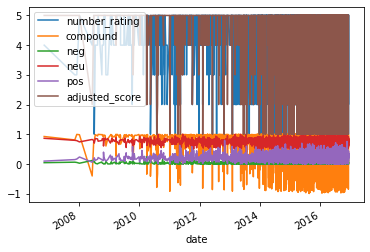

In [21]:

data.plot()


In [48]:
compound_data = data.compound.resample('M').mean().plot

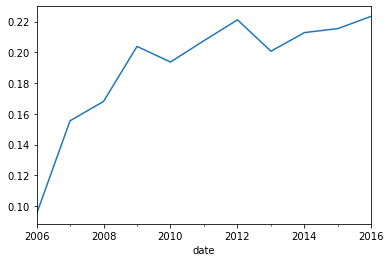

In [25]:
pos_data = data.pos.resample('Y').mean().plot()


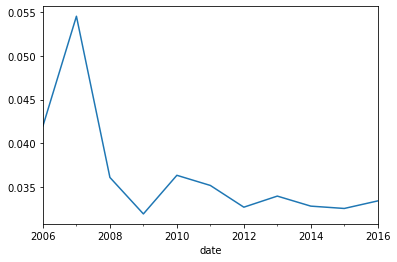

In [26]:
neg_data = data.neg.resample('Y').mean().plot()

<AxesSubplot:xlabel='date'>

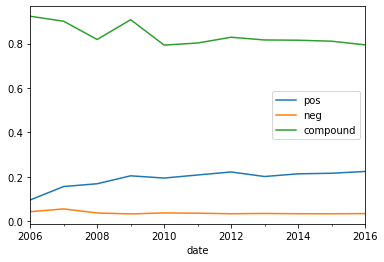

In [29]:
vars = ['pos', 'neg', 'compound']
data[vars].resample('Y').mean().plot()

In [19]:
#for i, x in data.interrows():
    #if -0.5 >= data.loc[i, 'compound'] < 0 : 
        #data.loc[i, 'compound'] = 1
    #elif 0 >= data.loc[i, 'compound'] <= 0.2 : 
        #data.loc[i, 'compound'] = 2
    #elif 0.2 > data.loc[i, 'compound'] <= 0.3 : 
        #data.loc[i, 'compound'] = 3
    #elif 0.3 > data.loc[i, 'compound'] <=0.6 : 
        #data.loc[i, 'compound'] = 4
    #else : 
        #data.loc[i, 'compound'] = 5

#SOS: trouble converting the compound to the likert scale 
        

In [22]:
data["adjusted_score"] = pd.cut(data.compound, 5, labels = [1, 2, 3, 4, 5]) #does if statements for me 

data.head()

,coffee_shop_name,full_review_text,star_rating,number_rating,desc,compound,neg,neu,pos,adjusted_score
date,,,,,,,,,,
2016-11-25,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0 star rating,5,11/25/2016 1 check-in Love love loved the atm...,0.9457,0.000,0.815,0.185,5
2016-12-02,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0 star rating,4,"12/2/2016 Listed in Date Night: Austin, Ambia...",0.9415,0.000,0.697,0.303,5
2016-11-30,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0 star rating,4,11/30/2016 1 check-in Listed in Brunch Spots ...,0.9936,0.004,0.828,0.168,5
2016-11-25,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0 star rating,2,11/25/2016 Very cool decor! Good drinks Nice ...,0.8047,0.090,0.731,0.179,5
2016-12-03,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0 star rating,4,12/3/2016 1 check-in They are located within ...,0.9393,0.015,0.850,0.135,5


In [18]:
from sklearn.metrics import cohen_kappa_score

# x and a y column make sure they are the same scale
# create bins for polarity scores i.e. 0 = 3 on likert scale, .5 = 5 on stars 
# or convert likert score to the polarity one 
# or max min scale to scale evrything from 0-1
# kappa expecting data to be ordinal
# make the x, y the columns that i have
# score is the amount of agreement between the two columns on a scale of 0-1
# i.e. if kappa = 1 both columns are perfectly matched, if kappa = 0 no agreement
# question: as a company how much do we need to care about reading the comments? 
# if it is low, there is a discrepancy of what people are saying and the rating they are giving, tests reliability of the likert scores. 




In [14]:
data.dtypes #recast number_rating and adjusted_scores 

coffee_shop_name      object
full_review_text      object
star_rating           object
number_rating         object
desc                  object
compound             float64
neg                  float64
neu                  float64
pos                  float64
adjusted_score      category
dtype: object

In [16]:
data["number_rating"] = data["number_rating"].astype(int)
data["adjusted_score"] = data["adjusted_score"].astype(int)

In [17]:
cohen_kappa_score(data["number_rating"], data["adjusted_score"])

0.10492016968429385